In [3]:
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker
import os
import numpy as np
plt.rcParams['figure.figsize'] = (15, 5)

# Computations

#### Investigate total number of valuable news pieces (i.e., having cascades) for Politifact/Gossip news
Just change paths to calculate for Politifact/Gossip

In [71]:
pathTweets = "FakeNewsNet_modified/code/fakenewsnet_dataset/gossipcop/tweets"
newsPath = "FakeNewsNet_modified/code/fakenewsnet_dataset/gossipcop/fake"
pathRetweets = "FakeNewsNet_modified/code/fakenewsnet_dataset/gossipcop/complete"
user_path = "FakeNewsNetTest/FakeNewsNet/code/fakenewsnet_dataset/user_followers"

In [69]:
tweeted = []
noItems = []
# Gather the names of the news articles which have tweets
for filename in os.listdir(pathTweets):
    data = pd.read_csv(pathTweets+"/"+filename)
    if len(data) > 0:
        tweeted.append(filename.rstrip(".csv"))
    else:
        noItems.append(filename)

for filename in os.listdir(newsPath):
    if filename not in tweeted:
        print(filename,"does not have tweets.")


politifact13484 does not have tweets.
politifact13541 does not have tweets.
politifact13570 does not have tweets.
politifact13745 does not have tweets.
politifact13919 does not have tweets.
politifact14116 does not have tweets.
politifact14195 does not have tweets.
politifact14236 does not have tweets.
politifact14305 does not have tweets.
politifact14388 does not have tweets.
politifact14394 does not have tweets.
politifact14490 does not have tweets.
politifact14507 does not have tweets.
politifact14534 does not have tweets.
politifact14543 does not have tweets.
politifact14567 does not have tweets.
politifact14597 does not have tweets.
politifact14668 does not have tweets.
politifact14678 does not have tweets.
politifact14727 does not have tweets.
politifact14759 does not have tweets.
politifact14769 does not have tweets.
politifact14836 does not have tweets.
politifact14855 does not have tweets.
politifact14862 does not have tweets.
politifact14932 does not have tweets.
politifact14

In [70]:
print(len(tweeted),"political news pieces actually have tweets.")
print(len(noItems),"political news pieces do not have tweets.")

390 political news pieces actually have tweets.
42 political news pieces do not have tweets.


In [28]:
print(len(tweeted)," gossip news pieces actually have tweets.")
print(len(noItems),"gossip news pieces do not have tweets.")

5105 news pieces actually have tweets.
218 news pieces do not have tweets.


#### 1) Find the number of cascades for each news piece. The number of cascades is defined by the number of unique, independent tweets about that news. <br>
#### 2) For each cascade find its size. The size of the cascade is defined as the number of unique users (or in other words number of retweets) per tweet.

In [29]:
cascade_count = {}
cascade_size = {}
for filename in tweeted:
    print("Processing",filename)
    tweet_data = pd.read_csv(pathTweets+"/"+filename+".csv")

    # Get cascade count
    cascade_count[filename] = len(tweet_data)

    # Get cascade size for every cascade of this news piece
    cascade_size_arr = []
    for tweet in tweet_data.tweet_id:
        retweet_count = {}
        size = (tweet_data[tweet_data.tweet_id == tweet].retweet_count).iloc[0]
#         print(size[0])
        retweet_count[tweet] = size if size > 0 else 1
        cascade_size_arr.append(retweet_count)

    cascade_size[filename] = cascade_size_arr

Processing gossipcop-1000240645
Processing gossipcop-1000908841
Processing gossipcop-1009248558
Processing gossipcop-1012123555
Processing gossipcop-1014383679
Processing gossipcop-1014616559
Processing gossipcop-1014636162
Processing gossipcop-1020220396
Processing gossipcop-1020335052
Processing gossipcop-1023576750
Processing gossipcop-1023869303
Processing gossipcop-1026488145
Processing gossipcop-1026793571
Processing gossipcop-1031800447
Processing gossipcop-1032468824
Processing gossipcop-1032664975
Processing gossipcop-1036952493
Processing gossipcop-1037841505
Processing gossipcop-1039751251
Processing gossipcop-1042406339
Processing gossipcop-1043854322
Processing gossipcop-1044110130
Processing gossipcop-10448753
Processing gossipcop-1046174363
Processing gossipcop-1046566535
Processing gossipcop-1049883569
Processing gossipcop-1051213706
Processing gossipcop-1051401062
Processing gossipcop-1051672830
Processing gossipcop-1052490641
Processing gossipcop-1053862865
Processing

Processing gossipcop-1497308886
Processing gossipcop-1498338899
Processing gossipcop-1500346265
Processing gossipcop-1500371630
Processing gossipcop-1500928748
Processing gossipcop-1501322357
Processing gossipcop-1501672732
Processing gossipcop-1505670647
Processing gossipcop-1509745173
Processing gossipcop-1509983640
Processing gossipcop-1515227891
Processing gossipcop-1517816546
Processing gossipcop-1518320128
Processing gossipcop-1521258335
Processing gossipcop-1525600180
Processing gossipcop-1526103103
Processing gossipcop-152704263
Processing gossipcop-1527285630
Processing gossipcop-1527288531
Processing gossipcop-1529722227
Processing gossipcop-1532318228
Processing gossipcop-1532524505
Processing gossipcop-1533362257
Processing gossipcop-1533690826
Processing gossipcop-1535895023
Processing gossipcop-1536008610
Processing gossipcop-1536255789
Processing gossipcop-1537399397
Processing gossipcop-1537867221
Processing gossipcop-1539005641
Processing gossipcop-1540378275
Processin

Processing gossipcop-190525100
Processing gossipcop-1905729180
Processing gossipcop-1908009150
Processing gossipcop-1908732473
Processing gossipcop-1909076702
Processing gossipcop-191156688
Processing gossipcop-1912691606
Processing gossipcop-1914781905
Processing gossipcop-1916002518
Processing gossipcop-1917210346
Processing gossipcop-1919108585
Processing gossipcop-1919200285
Processing gossipcop-1919418708
Processing gossipcop-1919556616
Processing gossipcop-1920823190
Processing gossipcop-1925612704
Processing gossipcop-1928968897
Processing gossipcop-1929736766
Processing gossipcop-1934036410
Processing gossipcop-193820483
Processing gossipcop-1942196966
Processing gossipcop-1945469340
Processing gossipcop-1946072246
Processing gossipcop-1949526577
Processing gossipcop-1949850843
Processing gossipcop-1950567758
Processing gossipcop-1951916011
Processing gossipcop-1952316280
Processing gossipcop-1954191714
Processing gossipcop-1954289539
Processing gossipcop-1955766846
Processing 

Processing gossipcop-2388806885
Processing gossipcop-2389711269
Processing gossipcop-2389838515
Processing gossipcop-2389938114
Processing gossipcop-2393519041
Processing gossipcop-2394847363
Processing gossipcop-2394982572
Processing gossipcop-2399257972
Processing gossipcop-2399302743
Processing gossipcop-2401725141
Processing gossipcop-2405182303
Processing gossipcop-2406635871
Processing gossipcop-2406767870
Processing gossipcop-2408301637
Processing gossipcop-2409092017
Processing gossipcop-2409856306
Processing gossipcop-2409992269
Processing gossipcop-2414287507
Processing gossipcop-2415967432
Processing gossipcop-2418065637
Processing gossipcop-2419353601
Processing gossipcop-2419841037
Processing gossipcop-2420429687
Processing gossipcop-242084790
Processing gossipcop-2421029600
Processing gossipcop-2422935746
Processing gossipcop-2425399472
Processing gossipcop-2426265642
Processing gossipcop-2429826373
Processing gossipcop-2433981481
Processing gossipcop-2435526162
Processin

Processing gossipcop-2853783393
Processing gossipcop-2853982179
Processing gossipcop-2854321309
Processing gossipcop-2856325908
Processing gossipcop-2856846379
Processing gossipcop-2859753224
Processing gossipcop-2860022327
Processing gossipcop-2862456586
Processing gossipcop-2863007901
Processing gossipcop-2863463279
Processing gossipcop-2868963763
Processing gossipcop-2870787911
Processing gossipcop-2873467495
Processing gossipcop-2874033235
Processing gossipcop-2875496174
Processing gossipcop-2877943909
Processing gossipcop-2879402342
Processing gossipcop-2880320914
Processing gossipcop-2881365356
Processing gossipcop-2886104361
Processing gossipcop-2887124659
Processing gossipcop-2887233910
Processing gossipcop-2892576573
Processing gossipcop-2893204024
Processing gossipcop-289348746
Processing gossipcop-289387905
Processing gossipcop-28951896
Processing gossipcop-2895484840
Processing gossipcop-2896734550
Processing gossipcop-2897235761
Processing gossipcop-2900315313
Processing g

Processing gossipcop-3294058859
Processing gossipcop-3294379135
Processing gossipcop-3294462993
Processing gossipcop-3294774733
Processing gossipcop-3297070329
Processing gossipcop-3297692322
Processing gossipcop-3300618073
Processing gossipcop-3301524860
Processing gossipcop-3306108022
Processing gossipcop-3306478944
Processing gossipcop-3308313232
Processing gossipcop-3308884181
Processing gossipcop-3309723742
Processing gossipcop-3316099372
Processing gossipcop-3316766645
Processing gossipcop-3316804883
Processing gossipcop-3316922141
Processing gossipcop-331851377
Processing gossipcop-3318815015
Processing gossipcop-3319390140
Processing gossipcop-3320255988
Processing gossipcop-3323597040
Processing gossipcop-3325039430
Processing gossipcop-3326678304
Processing gossipcop-3327428153
Processing gossipcop-3329043708
Processing gossipcop-3335565447
Processing gossipcop-333698649
Processing gossipcop-3339827367
Processing gossipcop-334083042
Processing gossipcop-3342928201
Processing 

Processing gossipcop-3783917182
Processing gossipcop-3791398232
Processing gossipcop-3792152819
Processing gossipcop-3793457990
Processing gossipcop-3795651880
Processing gossipcop-3795940197
Processing gossipcop-3795942487
Processing gossipcop-3796839427
Processing gossipcop-3798868176
Processing gossipcop-3798959319
Processing gossipcop-3799330435
Processing gossipcop-3799929008
Processing gossipcop-3800163388
Processing gossipcop-3800177373
Processing gossipcop-3801116516
Processing gossipcop-3807603124
Processing gossipcop-3808314704
Processing gossipcop-3810050309
Processing gossipcop-3814713470
Processing gossipcop-3815098857
Processing gossipcop-3816475916
Processing gossipcop-3816991540
Processing gossipcop-3817786461
Processing gossipcop-3821132681
Processing gossipcop-3824236400
Processing gossipcop-3824342313
Processing gossipcop-3824818320
Processing gossipcop-3825737803
Processing gossipcop-3826226036
Processing gossipcop-3829098404
Processing gossipcop-383021129
Processin

Processing gossipcop-4237114502
Processing gossipcop-4238006644
Processing gossipcop-4241531514
Processing gossipcop-4241859411
Processing gossipcop-4241884018
Processing gossipcop-4244107793
Processing gossipcop-4245034998
Processing gossipcop-4250351299
Processing gossipcop-4250377443
Processing gossipcop-4251184835
Processing gossipcop-4254023340
Processing gossipcop-4256841782
Processing gossipcop-4258497840
Processing gossipcop-4262449224
Processing gossipcop-4264578031
Processing gossipcop-4265306054
Processing gossipcop-4266144801
Processing gossipcop-4271815483
Processing gossipcop-4274245097
Processing gossipcop-4274657473
Processing gossipcop-4277956731
Processing gossipcop-42820666
Processing gossipcop-4282673292
Processing gossipcop-4291525988
Processing gossipcop-4293581641
Processing gossipcop-4294141783
Processing gossipcop-4294249994
Processing gossipcop-4294323822
Processing gossipcop-429778691
Processing gossipcop-4298568194
Processing gossipcop-4298949105
Processing 

Processing gossipcop-4728026144
Processing gossipcop-472983284
Processing gossipcop-4734433452
Processing gossipcop-4739595208
Processing gossipcop-4740628819
Processing gossipcop-4743998220
Processing gossipcop-4745628397
Processing gossipcop-4749592824
Processing gossipcop-4750283064
Processing gossipcop-4751816718
Processing gossipcop-4753941767
Processing gossipcop-4755663729
Processing gossipcop-4757444837
Processing gossipcop-4763534666
Processing gossipcop-4763726512
Processing gossipcop-4765459213
Processing gossipcop-4765521585
Processing gossipcop-4765574944
Processing gossipcop-4766639751
Processing gossipcop-4768336851
Processing gossipcop-4768952264
Processing gossipcop-4769457532
Processing gossipcop-4769910138
Processing gossipcop-4771324886
Processing gossipcop-4772953023
Processing gossipcop-4773027628
Processing gossipcop-4774142356
Processing gossipcop-4775370060
Processing gossipcop-4778714585
Processing gossipcop-4780852492
Processing gossipcop-4781000361
Processin

Processing gossipcop-5166944687
Processing gossipcop-5167547607
Processing gossipcop-5168094775
Processing gossipcop-5168265842
Processing gossipcop-5170578278
Processing gossipcop-5170642059
Processing gossipcop-5170938134
Processing gossipcop-5173208358
Processing gossipcop-5174730972
Processing gossipcop-517568562
Processing gossipcop-5175859472
Processing gossipcop-5176410105
Processing gossipcop-5177133863
Processing gossipcop-5177801843
Processing gossipcop-5180376820
Processing gossipcop-5181890716
Processing gossipcop-5182985830
Processing gossipcop-5187076963
Processing gossipcop-5188841381
Processing gossipcop-5189580095
Processing gossipcop-5194722022
Processing gossipcop-5199473616
Processing gossipcop-5201022547
Processing gossipcop-5203580690
Processing gossipcop-5204071755
Processing gossipcop-5206620197
Processing gossipcop-5207040963
Processing gossipcop-5210074680
Processing gossipcop-5210414258
Processing gossipcop-5215807248
Processing gossipcop-5216936638
Processin

Processing gossipcop-5647859041
Processing gossipcop-5648108033
Processing gossipcop-564932523
Processing gossipcop-5650911362
Processing gossipcop-5654555353
Processing gossipcop-5656473493
Processing gossipcop-5656786138
Processing gossipcop-5656838669
Processing gossipcop-5657318506
Processing gossipcop-5658990975
Processing gossipcop-5659324156
Processing gossipcop-5660956780
Processing gossipcop-5660970075
Processing gossipcop-5663280204
Processing gossipcop-5663483713
Processing gossipcop-5663764889
Processing gossipcop-5667202198
Processing gossipcop-5668487773
Processing gossipcop-5669041678
Processing gossipcop-5669306231
Processing gossipcop-5669853662
Processing gossipcop-5669859158
Processing gossipcop-5671352259
Processing gossipcop-5672267043
Processing gossipcop-567316461
Processing gossipcop-5676936066
Processing gossipcop-567879122
Processing gossipcop-5680002710
Processing gossipcop-5682477415
Processing gossipcop-5684400921
Processing gossipcop-5687950104
Processing 

Processing gossipcop-6052102342
Processing gossipcop-6054176546
Processing gossipcop-6054897463
Processing gossipcop-6056074095
Processing gossipcop-6057351604
Processing gossipcop-6057388222
Processing gossipcop-6058088749
Processing gossipcop-6061450135
Processing gossipcop-6061819854
Processing gossipcop-6061862691
Processing gossipcop-6062748853
Processing gossipcop-606633573
Processing gossipcop-606657710
Processing gossipcop-6068765070
Processing gossipcop-6069295188
Processing gossipcop-6071391632
Processing gossipcop-6072138753
Processing gossipcop-607558250
Processing gossipcop-6075942682
Processing gossipcop-6080423508
Processing gossipcop-6081419100
Processing gossipcop-6084281104
Processing gossipcop-6088782958
Processing gossipcop-6088789519
Processing gossipcop-6090353237
Processing gossipcop-609522805
Processing gossipcop-6096757093
Processing gossipcop-6098748582
Processing gossipcop-6099907894
Processing gossipcop-6100799526
Processing gossipcop-6102441969
Processing g

Processing gossipcop-6517934626
Processing gossipcop-6519223126
Processing gossipcop-6522821514
Processing gossipcop-6523629288
Processing gossipcop-6524879158
Processing gossipcop-6525009203
Processing gossipcop-6527168219
Processing gossipcop-6528028630
Processing gossipcop-6529156069
Processing gossipcop-653088275
Processing gossipcop-6532581624
Processing gossipcop-6535964027
Processing gossipcop-6537881170
Processing gossipcop-6540109120
Processing gossipcop-6543495671
Processing gossipcop-654770829
Processing gossipcop-6548314707
Processing gossipcop-655050022
Processing gossipcop-6550794665
Processing gossipcop-6554497334
Processing gossipcop-655515205
Processing gossipcop-6555799194
Processing gossipcop-6559744284
Processing gossipcop-6562422971
Processing gossipcop-6563666761
Processing gossipcop-6563860366
Processing gossipcop-656513706
Processing gossipcop-6572998065
Processing gossipcop-6574515067
Processing gossipcop-6575035351
Processing gossipcop-6578816195
Processing go

Processing gossipcop-6993270746
Processing gossipcop-6993299340
Processing gossipcop-6998565068
Processing gossipcop-700157068
Processing gossipcop-7001874858
Processing gossipcop-701012392
Processing gossipcop-7010183951
Processing gossipcop-7010349230
Processing gossipcop-7010369703
Processing gossipcop-7013705598
Processing gossipcop-7013719242
Processing gossipcop-7014571828
Processing gossipcop-7015125430
Processing gossipcop-7015799492
Processing gossipcop-7017911086
Processing gossipcop-7018727955
Processing gossipcop-7019017836
Processing gossipcop-7020711548
Processing gossipcop-7023055459
Processing gossipcop-7025900082
Processing gossipcop-7026078049
Processing gossipcop-7028000763
Processing gossipcop-7028678112
Processing gossipcop-703016938
Processing gossipcop-703431151
Processing gossipcop-7035425505
Processing gossipcop-7036026897
Processing gossipcop-7038744891
Processing gossipcop-7043884479
Processing gossipcop-704613811
Processing gossipcop-7046951531
Processing go

Processing gossipcop-7394790075
Processing gossipcop-7397523769
Processing gossipcop-7400204028
Processing gossipcop-7401878220
Processing gossipcop-7404608123
Processing gossipcop-7405934844
Processing gossipcop-7411686847
Processing gossipcop-7414166530
Processing gossipcop-7415145896
Processing gossipcop-7415621392
Processing gossipcop-7417601289
Processing gossipcop-7424409291
Processing gossipcop-7426143402
Processing gossipcop-7426544643
Processing gossipcop-7427687733
Processing gossipcop-7429601831
Processing gossipcop-7431764476
Processing gossipcop-7433410608
Processing gossipcop-7440482567
Processing gossipcop-7441479148
Processing gossipcop-7444914406
Processing gossipcop-7445112152
Processing gossipcop-7449680289
Processing gossipcop-745116685
Processing gossipcop-7453253042
Processing gossipcop-745443119
Processing gossipcop-7455036395
Processing gossipcop-7455413235
Processing gossipcop-7455600910
Processing gossipcop-745923114
Processing gossipcop-7462640326
Processing 

Processing gossipcop-7887456921
Processing gossipcop-7889565756
Processing gossipcop-7890297085
Processing gossipcop-7890911428
Processing gossipcop-7891219893
Processing gossipcop-7894516039
Processing gossipcop-7894684433
Processing gossipcop-789623646
Processing gossipcop-7896911317
Processing gossipcop-7897551259
Processing gossipcop-790252610
Processing gossipcop-7905012051
Processing gossipcop-7905456260
Processing gossipcop-7905541453
Processing gossipcop-7908910194
Processing gossipcop-7909120625
Processing gossipcop-7910866248
Processing gossipcop-7913189384
Processing gossipcop-7914178475
Processing gossipcop-7916840350
Processing gossipcop-7917664499
Processing gossipcop-7917898417
Processing gossipcop-7920962169
Processing gossipcop-7921077990
Processing gossipcop-7921561941
Processing gossipcop-7921708101
Processing gossipcop-7924388386
Processing gossipcop-7928304062
Processing gossipcop-7932521110
Processing gossipcop-7938752346
Processing gossipcop-7940502853
Processing

Processing gossipcop-8365481521
Processing gossipcop-8365993096
Processing gossipcop-836640618
Processing gossipcop-8367687233
Processing gossipcop-8370008544
Processing gossipcop-8370550947
Processing gossipcop-8372145117
Processing gossipcop-8372874438
Processing gossipcop-8373466783
Processing gossipcop-8373962867
Processing gossipcop-837434561
Processing gossipcop-8374643527
Processing gossipcop-8375729179
Processing gossipcop-8376426933
Processing gossipcop-837671885
Processing gossipcop-8376831160
Processing gossipcop-8379643306
Processing gossipcop-8380675168
Processing gossipcop-8383689638
Processing gossipcop-8385288350
Processing gossipcop-8386188284
Processing gossipcop-8387525297
Processing gossipcop-8387711520
Processing gossipcop-8391326682
Processing gossipcop-8392424140
Processing gossipcop-8393658999
Processing gossipcop-8394133837
Processing gossipcop-83953176
Processing gossipcop-8397403501
Processing gossipcop-8403246308
Processing gossipcop-8403500283
Processing go

Processing gossipcop-8856841965
Processing gossipcop-8859694590
Processing gossipcop-8860079359
Processing gossipcop-886118982
Processing gossipcop-886177297
Processing gossipcop-8862742609
Processing gossipcop-8865163539
Processing gossipcop-8865743828
Processing gossipcop-8865847454
Processing gossipcop-8867519772
Processing gossipcop-886883614
Processing gossipcop-8871430966
Processing gossipcop-8871505752
Processing gossipcop-8875435152
Processing gossipcop-8877042466
Processing gossipcop-887882317
Processing gossipcop-8882167387
Processing gossipcop-8882451342
Processing gossipcop-8884898167
Processing gossipcop-8885333485
Processing gossipcop-8886605619
Processing gossipcop-8886918041
Processing gossipcop-8886966654
Processing gossipcop-8887202012
Processing gossipcop-8887454037
Processing gossipcop-8888811836
Processing gossipcop-8889799564
Processing gossipcop-8890242614
Processing gossipcop-8892524070
Processing gossipcop-88943555
Processing gossipcop-8897143051
Processing gos

Processing gossipcop-9281478920
Processing gossipcop-9283531511
Processing gossipcop-9285642638
Processing gossipcop-9286575789
Processing gossipcop-9288489962
Processing gossipcop-9289462538
Processing gossipcop-929011404
Processing gossipcop-9292808826
Processing gossipcop-9294163823
Processing gossipcop-9297111038
Processing gossipcop-9302133862
Processing gossipcop-9304614910
Processing gossipcop-9304916601
Processing gossipcop-9305277981
Processing gossipcop-9307576075
Processing gossipcop-9311146319
Processing gossipcop-931200854
Processing gossipcop-9312571596
Processing gossipcop-9318916922
Processing gossipcop-9320114358
Processing gossipcop-9320862502
Processing gossipcop-9322288804
Processing gossipcop-9322870121
Processing gossipcop-9324384637
Processing gossipcop-9324688033
Processing gossipcop-9324729132
Processing gossipcop-932555221
Processing gossipcop-93262280
Processing gossipcop-9326465416
Processing gossipcop-9327540025
Processing gossipcop-9328842988
Processing go

Processing gossipcop-9708107355
Processing gossipcop-9711445957
Processing gossipcop-9712091111
Processing gossipcop-9713275683
Processing gossipcop-9715529297
Processing gossipcop-9716230263
Processing gossipcop-9717323243
Processing gossipcop-9717771437
Processing gossipcop-9718784854
Processing gossipcop-971921890
Processing gossipcop-9720326723
Processing gossipcop-9721791122
Processing gossipcop-9721947560
Processing gossipcop-9724042069
Processing gossipcop-9726744105
Processing gossipcop-9727779952
Processing gossipcop-9729699482
Processing gossipcop-9732770662
Processing gossipcop-9735192794
Processing gossipcop-9737431196
Processing gossipcop-9737462530
Processing gossipcop-9737723367
Processing gossipcop-9740483458
Processing gossipcop-9746539314
Processing gossipcop-9746788878
Processing gossipcop-9746890701
Processing gossipcop-9752823264
Processing gossipcop-9754080475
Processing gossipcop-9754111525
Processing gossipcop-9754344080
Processing gossipcop-9755892564
Processin

In [30]:
cascade_count

{'gossipcop-1000240645': 115,
 'gossipcop-1000908841': 3,
 'gossipcop-1009248558': 4,
 'gossipcop-1012123555': 11,
 'gossipcop-1014383679': 26,
 'gossipcop-1014616559': 772,
 'gossipcop-1014636162': 216,
 'gossipcop-1020220396': 955,
 'gossipcop-1020335052': 935,
 'gossipcop-1023576750': 2,
 'gossipcop-1023869303': 54,
 'gossipcop-1026488145': 7,
 'gossipcop-1026793571': 16,
 'gossipcop-1031800447': 7,
 'gossipcop-1032468824': 12,
 'gossipcop-1032664975': 9,
 'gossipcop-1036952493': 7,
 'gossipcop-1037841505': 14,
 'gossipcop-1039751251': 1,
 'gossipcop-1042406339': 2,
 'gossipcop-1043854322': 1,
 'gossipcop-1044110130': 9,
 'gossipcop-10448753': 153,
 'gossipcop-1046174363': 20,
 'gossipcop-1046566535': 4,
 'gossipcop-1049883569': 51,
 'gossipcop-1051213706': 13,
 'gossipcop-1051401062': 12,
 'gossipcop-1051672830': 2,
 'gossipcop-1052490641': 8,
 'gossipcop-1053862865': 60,
 'gossipcop-1053975112': 7,
 'gossipcop-1055577574': 22,
 'gossipcop-1059489954': 2,
 'gossipcop-1063768757': 2

In [36]:
cascade_size

{'gossipcop-1000240645': [{133247921637433344: 1},
  {148464728027561984: 1},
  {15280521439: 1},
  {15280752142: 1},
  {15280775581: 1},
  {15284376933: 1},
  {15286400250: 1},
  {15304825948: 1},
  {15314917145: 1},
  {158730668728270848: 1},
  {173373030897160193: 1},
  {174352653072084992: 1},
  {244987596223160321: 1},
  {258319491941928960: 1},
  {275979714546511872: 1},
  {29175969151451136: 1},
  {331372639065088001: 1},
  {3375455802: 1},
  {346863471805202432: 1},
  {346894485839552513: 1},
  {395920178728697856: 1},
  {440365057357389824: 1},
  {470285136399843328: 1},
  {470287650981572608: 1},
  {470299655616479232: 1},
  {470303845457723392: 1},
  {470303860104253440: 1},
  {470305261450588161: 1},
  {470326206819078144: 1},
  {470366992516390912: 1},
  {470369763932114945: 1},
  {470415277184667648: 1},
  {470422310185230336: 1},
  {470444847036243968: 1},
  {470496064634490880: 1},
  {470508235816857601: 1},
  {470557609578082304: 1},
  {470595831515455489: 1},
  {47060

####  3) Find the maximum-breadth of the cascade. The maximum-breadth of a cascade is defined as the maximal number of users involved with the cascade. Since every retweet of a user is posted into his followers' timeline in this metric we count the unique followers of a user as well.

In [37]:
cascade_max_breadth = {}
for filename in tweeted:
    print("Processing",filename)
    tweet_data = pd.read_csv(pathTweets+"/"+filename+".csv")

    # If the retweet_data dataframe cannot be read it means that there were no retweets and therefore every
    # cascade of this new piece will have size 1. To calculate the maximum-breadth we shall only add the 
    # number of followers the user from where the tweet originates has.
    try:
        retweet_data = pd.read_csv(pathRetweets+"/"+filename+".csv")
        
        # Get cascade breadth for every cascade of this news piece
        cascade_breadth_arr = []
        for tweet in tweet_data.tweet_id:
            retweets_tweets = {}
            
            # To keep track of the total followers for the users for which we have data
            # Then we take the unique number of these total followers
            followers_arr = []
        
            # For the users for which we don't have data we can still get the number of followers
            # but unfortunately not of unique followers
            count = 0
            
            # Get user id
            user_id = (tweet_data[tweet_data.tweet_id == tweet].user_id).iloc[0]
    
            # Ignore if politifact and/or gossipcop are tweeting something because this not actual
            # spread of fake news.
            if user_id not in [8953122, 25701904]:
                
                count += (tweet_data[tweet_data.tweet_id == tweet].followers_count).iloc[0]
                retweet_id = retweet_data[retweet_data.retweeted_id == tweet]
        
                for index, rows in retweet_id.iterrows():
                    try:
                        with open(user_path+"/"+str(rows.user_id)+".json") as json_file:
                            datastream = json.load(json_file)
                            followers_arr += datastream['followers']
                    # We don't have data for all useers. If that's the case we just get the #followers
                    # not the #unique_followers
                    except FileNotFoundError as e:
                        count += rows.followers_count

            size = len(retweet_data[retweet_data.retweeted_id == tweet]) 
            retweets_tweets[tweet] = size if size > 0 else 1
            retweets_tweets[tweet] += len(set(followers_arr)) + count
            
            cascade_breadth_arr.append(retweets_tweets)
    
    # No retweets are there        
    except FileNotFoundError as e:
                
        cascade_breadth_arr = []
        for tweet in tweet_data.tweet_id:
            retweets_tweets = {}
            retweets_tweets[tweet] = 1 + tweet_data[tweet_data.tweet_id == tweet].followers_count
            cascade_size_arr.append(retweets_tweets)
            
    cascade_max_breadth[filename] = cascade_breadth_arr

Processing gossipcop-1000240645
Processing gossipcop-1000908841
Processing gossipcop-1009248558
Processing gossipcop-1012123555
Processing gossipcop-1014383679
Processing gossipcop-1014616559
Processing gossipcop-1014636162
Processing gossipcop-1020220396
Processing gossipcop-1020335052
Processing gossipcop-1023576750
Processing gossipcop-1023869303
Processing gossipcop-1026488145
Processing gossipcop-1026793571
Processing gossipcop-1031800447
Processing gossipcop-1032468824
Processing gossipcop-1032664975
Processing gossipcop-1036952493
Processing gossipcop-1037841505
Processing gossipcop-1039751251
Processing gossipcop-1042406339
Processing gossipcop-1043854322
Processing gossipcop-1044110130
Processing gossipcop-10448753
Processing gossipcop-1046174363
Processing gossipcop-1046566535
Processing gossipcop-1049883569
Processing gossipcop-1051213706
Processing gossipcop-1051401062
Processing gossipcop-1051672830
Processing gossipcop-1052490641
Processing gossipcop-1053862865
Processing

Processing gossipcop-1495995782
Processing gossipcop-1497308886
Processing gossipcop-1498338899
Processing gossipcop-1500346265
Processing gossipcop-1500371630
Processing gossipcop-1500928748
Processing gossipcop-1501322357
Processing gossipcop-1501672732
Processing gossipcop-1505670647
Processing gossipcop-1509745173
Processing gossipcop-1509983640
Processing gossipcop-1515227891
Processing gossipcop-1517816546
Processing gossipcop-1518320128
Processing gossipcop-1521258335
Processing gossipcop-1525600180
Processing gossipcop-1526103103
Processing gossipcop-152704263
Processing gossipcop-1527285630
Processing gossipcop-1527288531
Processing gossipcop-1529722227
Processing gossipcop-1532318228
Processing gossipcop-1532524505
Processing gossipcop-1533362257
Processing gossipcop-1533690826
Processing gossipcop-1535895023
Processing gossipcop-1536008610
Processing gossipcop-1536255789
Processing gossipcop-1537399397
Processing gossipcop-1537867221
Processing gossipcop-1539005641
Processin

Processing gossipcop-189024222
Processing gossipcop-1893175436
Processing gossipcop-1895637161
Processing gossipcop-1897931921
Processing gossipcop-1901912137
Processing gossipcop-1903074961
Processing gossipcop-1903137947
Processing gossipcop-1904248445
Processing gossipcop-190525100
Processing gossipcop-1905729180
Processing gossipcop-1908009150
Processing gossipcop-1908732473
Processing gossipcop-1909076702
Processing gossipcop-191156688
Processing gossipcop-1912691606
Processing gossipcop-1914781905
Processing gossipcop-1916002518
Processing gossipcop-1917210346
Processing gossipcop-1919108585
Processing gossipcop-1919200285
Processing gossipcop-1919418708
Processing gossipcop-1919556616
Processing gossipcop-1920823190
Processing gossipcop-1925612704
Processing gossipcop-1928968897
Processing gossipcop-1929736766
Processing gossipcop-1934036410
Processing gossipcop-193820483
Processing gossipcop-1942196966
Processing gossipcop-1945469340
Processing gossipcop-1946072246
Processing g

Processing gossipcop-2366012895
Processing gossipcop-2366390146
Processing gossipcop-2368835056
Processing gossipcop-2369722026
Processing gossipcop-2375563556
Processing gossipcop-2377360127
Processing gossipcop-2384909612
Processing gossipcop-2388079029
Processing gossipcop-2388806885
Processing gossipcop-2389711269
Processing gossipcop-2389838515
Processing gossipcop-2389938114
Processing gossipcop-2393519041
Processing gossipcop-2394847363
Processing gossipcop-2394982572
Processing gossipcop-2399257972
Processing gossipcop-2399302743
Processing gossipcop-2401725141
Processing gossipcop-2405182303
Processing gossipcop-2406635871
Processing gossipcop-2406767870
Processing gossipcop-2408301637
Processing gossipcop-2409092017
Processing gossipcop-2409856306
Processing gossipcop-2409992269
Processing gossipcop-2414287507
Processing gossipcop-2415967432
Processing gossipcop-2418065637
Processing gossipcop-2419353601
Processing gossipcop-2419841037
Processing gossipcop-2420429687
Processi

Processing gossipcop-2843886896
Processing gossipcop-2844019630
Processing gossipcop-2847371632
Processing gossipcop-2848772246
Processing gossipcop-2850498997
Processing gossipcop-2851107288
Processing gossipcop-285127609
Processing gossipcop-2851525239
Processing gossipcop-2852717230
Processing gossipcop-2853783393
Processing gossipcop-2853982179
Processing gossipcop-2854321309
Processing gossipcop-2856325908
Processing gossipcop-2856846379
Processing gossipcop-2859753224
Processing gossipcop-2860022327
Processing gossipcop-2862456586
Processing gossipcop-2863007901
Processing gossipcop-2863463279
Processing gossipcop-2868963763
Processing gossipcop-2870787911
Processing gossipcop-2873467495
Processing gossipcop-2874033235
Processing gossipcop-2875496174
Processing gossipcop-2877943909
Processing gossipcop-2879402342
Processing gossipcop-2880320914
Processing gossipcop-2881365356
Processing gossipcop-2886104361
Processing gossipcop-2887124659
Processing gossipcop-2887233910
Processin

Processing gossipcop-3271653405
Processing gossipcop-3273857391
Processing gossipcop-3278265201
Processing gossipcop-3280356381
Processing gossipcop-3281154264
Processing gossipcop-3282186402
Processing gossipcop-3282302319
Processing gossipcop-3285447117
Processing gossipcop-3286453896
Processing gossipcop-32866435
Processing gossipcop-3286731636
Processing gossipcop-328760913
Processing gossipcop-3288271088
Processing gossipcop-3289577556
Processing gossipcop-3291310272
Processing gossipcop-3294058859
Processing gossipcop-3294379135
Processing gossipcop-3294462993
Processing gossipcop-3294774733
Processing gossipcop-3297070329
Processing gossipcop-3297692322
Processing gossipcop-3300618073
Processing gossipcop-3301524860
Processing gossipcop-3306108022
Processing gossipcop-3306478944
Processing gossipcop-3308313232
Processing gossipcop-3308884181
Processing gossipcop-3309723742
Processing gossipcop-3316099372
Processing gossipcop-3316766645
Processing gossipcop-3316804883
Processing 

Processing gossipcop-3753468656
Processing gossipcop-3754107472
Processing gossipcop-3754617510
Processing gossipcop-3758131250
Processing gossipcop-3758259794
Processing gossipcop-3761702205
Processing gossipcop-3767932547
Processing gossipcop-3771847066
Processing gossipcop-3773878961
Processing gossipcop-3776508422
Processing gossipcop-3778804574
Processing gossipcop-3778826762
Processing gossipcop-3780210928
Processing gossipcop-3780295352
Processing gossipcop-3783917182
Processing gossipcop-3791398232
Processing gossipcop-3792152819
Processing gossipcop-3793457990
Processing gossipcop-3795651880
Processing gossipcop-3795940197
Processing gossipcop-3795942487
Processing gossipcop-3796839427
Processing gossipcop-3798868176
Processing gossipcop-3798959319
Processing gossipcop-3799330435
Processing gossipcop-3799929008
Processing gossipcop-3800163388
Processing gossipcop-3800177373
Processing gossipcop-3801116516
Processing gossipcop-3807603124
Processing gossipcop-3808314704
Processi

Processing gossipcop-4223634194
Processing gossipcop-4224035489
Processing gossipcop-422487545
Processing gossipcop-4225063221
Processing gossipcop-4225127848
Processing gossipcop-4226541574
Processing gossipcop-4229159426
Processing gossipcop-4230371336
Processing gossipcop-4233174426
Processing gossipcop-4235263494
Processing gossipcop-4237114502
Processing gossipcop-4238006644
Processing gossipcop-4241531514
Processing gossipcop-4241859411
Processing gossipcop-4241884018
Processing gossipcop-4244107793
Processing gossipcop-4245034998
Processing gossipcop-4250351299
Processing gossipcop-4250377443
Processing gossipcop-4251184835
Processing gossipcop-4254023340
Processing gossipcop-4256841782
Processing gossipcop-4258497840
Processing gossipcop-4262449224
Processing gossipcop-4264578031
Processing gossipcop-4265306054
Processing gossipcop-4266144801
Processing gossipcop-4271815483
Processing gossipcop-4274245097
Processing gossipcop-4274657473
Processing gossipcop-4277956731
Processin

Processing gossipcop-4712654723
Processing gossipcop-4716941257
Processing gossipcop-4716984662
Processing gossipcop-4717386526
Processing gossipcop-4717531742
Processing gossipcop-4719539514
Processing gossipcop-4719602650
Processing gossipcop-4722031516
Processing gossipcop-4723908193
Processing gossipcop-4727176849
Processing gossipcop-4728026144
Processing gossipcop-472983284
Processing gossipcop-4734433452
Processing gossipcop-4739595208
Processing gossipcop-4740628819
Processing gossipcop-4743998220
Processing gossipcop-4745628397
Processing gossipcop-4749592824
Processing gossipcop-4750283064
Processing gossipcop-4751816718
Processing gossipcop-4753941767
Processing gossipcop-4755663729
Processing gossipcop-4757444837
Processing gossipcop-4763534666
Processing gossipcop-4763726512
Processing gossipcop-4765459213
Processing gossipcop-4765521585
Processing gossipcop-4765574944
Processing gossipcop-4766639751
Processing gossipcop-4768336851
Processing gossipcop-4768952264
Processin

Processing gossipcop-5152718676
Processing gossipcop-5152768016
Processing gossipcop-5154064086
Processing gossipcop-5154199280
Processing gossipcop-5154947333
Processing gossipcop-5156379060
Processing gossipcop-5161133028
Processing gossipcop-516224513
Processing gossipcop-5162567437
Processing gossipcop-5163590625
Processing gossipcop-5163664689
Processing gossipcop-5164129802
Processing gossipcop-5164614857
Processing gossipcop-5165661741
Processing gossipcop-5166329443
Processing gossipcop-516675994
Processing gossipcop-5166944687
Processing gossipcop-5167547607
Processing gossipcop-5168094775
Processing gossipcop-5168265842
Processing gossipcop-5170578278
Processing gossipcop-5170642059
Processing gossipcop-5170938134
Processing gossipcop-5173208358
Processing gossipcop-5174730972
Processing gossipcop-517568562
Processing gossipcop-5175859472
Processing gossipcop-5176410105
Processing gossipcop-5177133863
Processing gossipcop-5177801843
Processing gossipcop-5180376820
Processing 

Processing gossipcop-5615107600
Processing gossipcop-5618809668
Processing gossipcop-5618846968
Processing gossipcop-5618879938
Processing gossipcop-562105988
Processing gossipcop-562132594
Processing gossipcop-5624067838
Processing gossipcop-5625770898
Processing gossipcop-5627872766
Processing gossipcop-562893178
Processing gossipcop-5630814357
Processing gossipcop-5638983400
Processing gossipcop-5642800213
Processing gossipcop-5643064581
Processing gossipcop-5643074308
Processing gossipcop-5645850485
Processing gossipcop-5647859041
Processing gossipcop-5648108033
Processing gossipcop-564932523
Processing gossipcop-5650911362
Processing gossipcop-5654555353
Processing gossipcop-5656473493
Processing gossipcop-5656786138
Processing gossipcop-5656838669
Processing gossipcop-5657318506
Processing gossipcop-5658990975
Processing gossipcop-5659324156
Processing gossipcop-5660956780
Processing gossipcop-5660970075
Processing gossipcop-5663280204
Processing gossipcop-5663483713
Processing g

Processing gossipcop-6031013673
Processing gossipcop-6033353322
Processing gossipcop-6035324631
Processing gossipcop-6036532804
Processing gossipcop-6036776411
Processing gossipcop-6037147922
Processing gossipcop-6038714010
Processing gossipcop-6041037878
Processing gossipcop-6042070700
Processing gossipcop-6043500630
Processing gossipcop-6044982799
Processing gossipcop-6045045567
Processing gossipcop-6045778417
Processing gossipcop-6048462622
Processing gossipcop-6049574291
Processing gossipcop-6050854656
Processing gossipcop-6051845337
Processing gossipcop-6052102342
Processing gossipcop-6054176546
Processing gossipcop-6054897463
Processing gossipcop-6056074095
Processing gossipcop-6057351604
Processing gossipcop-6057388222
Processing gossipcop-6058088749
Processing gossipcop-6061450135
Processing gossipcop-6061819854
Processing gossipcop-6061862691
Processing gossipcop-6062748853
Processing gossipcop-606633573
Processing gossipcop-606657710
Processing gossipcop-6068765070
Processing

Processing gossipcop-6488638301
Processing gossipcop-6489461221
Processing gossipcop-6490497167
Processing gossipcop-6495983081
Processing gossipcop-6496181044
Processing gossipcop-6502992052
Processing gossipcop-6503389654
Processing gossipcop-6503862028
Processing gossipcop-6504249629
Processing gossipcop-6505855553
Processing gossipcop-6509869720
Processing gossipcop-6510348219
Processing gossipcop-651286924
Processing gossipcop-6516122558
Processing gossipcop-6517934626
Processing gossipcop-6519223126
Processing gossipcop-6522821514
Processing gossipcop-6523629288
Processing gossipcop-6524879158
Processing gossipcop-6525009203
Processing gossipcop-6527168219
Processing gossipcop-6528028630
Processing gossipcop-6529156069
Processing gossipcop-653088275
Processing gossipcop-6532581624
Processing gossipcop-6535964027
Processing gossipcop-6537881170
Processing gossipcop-6540109120
Processing gossipcop-6543495671
Processing gossipcop-654770829
Processing gossipcop-6548314707
Processing 

Processing gossipcop-6973925657
Processing gossipcop-6974111719
Processing gossipcop-6975529775
Processing gossipcop-6976298194
Processing gossipcop-6979069951
Processing gossipcop-6982132348
Processing gossipcop-6982710185
Processing gossipcop-698437440
Processing gossipcop-6984927757
Processing gossipcop-6986473289
Processing gossipcop-6987256464
Processing gossipcop-6988354769
Processing gossipcop-6991357264
Processing gossipcop-6991597859
Processing gossipcop-699303448
Processing gossipcop-6993270746
Processing gossipcop-6993299340
Processing gossipcop-6998565068
Processing gossipcop-700157068
Processing gossipcop-7001874858
Processing gossipcop-701012392
Processing gossipcop-7010183951
Processing gossipcop-7010349230
Processing gossipcop-7010369703
Processing gossipcop-7013705598
Processing gossipcop-7013719242
Processing gossipcop-7014571828
Processing gossipcop-7015125430
Processing gossipcop-7015799492
Processing gossipcop-7017911086
Processing gossipcop-7018727955
Processing g

Processing gossipcop-7371979404
Processing gossipcop-737368770
Processing gossipcop-7374728839
Processing gossipcop-7378651908
Processing gossipcop-7379846746
Processing gossipcop-7380022110
Processing gossipcop-73810249
Processing gossipcop-7382234917
Processing gossipcop-7383365732
Processing gossipcop-7384566778
Processing gossipcop-738723713
Processing gossipcop-7387267741
Processing gossipcop-7387951747
Processing gossipcop-7391946984
Processing gossipcop-7392274516
Processing gossipcop-7394790075
Processing gossipcop-7397523769
Processing gossipcop-7400204028
Processing gossipcop-7401878220
Processing gossipcop-7404608123
Processing gossipcop-7405934844
Processing gossipcop-7411686847
Processing gossipcop-7414166530
Processing gossipcop-7415145896
Processing gossipcop-7415621392
Processing gossipcop-7417601289
Processing gossipcop-7424409291
Processing gossipcop-7426143402
Processing gossipcop-7426544643
Processing gossipcop-7427687733
Processing gossipcop-7429601831
Processing g

Processing gossipcop-8335903982
Processing gossipcop-8339248612
Processing gossipcop-8342414455
Processing gossipcop-8343609291
Processing gossipcop-8344705765
Processing gossipcop-834472291
Processing gossipcop-8346794076
Processing gossipcop-8347330267
Processing gossipcop-8347611424
Processing gossipcop-8349914612
Processing gossipcop-8352116249
Processing gossipcop-8353894138
Processing gossipcop-8354549164
Processing gossipcop-8356295970
Processing gossipcop-8356599800
Processing gossipcop-8357945561
Processing gossipcop-8363534048
Processing gossipcop-8365481521
Processing gossipcop-8365993096
Processing gossipcop-836640618
Processing gossipcop-8367687233
Processing gossipcop-8370008544
Processing gossipcop-8370550947
Processing gossipcop-8372145117
Processing gossipcop-8372874438
Processing gossipcop-8373466783
Processing gossipcop-8373962867
Processing gossipcop-837434561
Processing gossipcop-8374643527
Processing gossipcop-8375729179
Processing gossipcop-8376426933
Processing 

Processing gossipcop-8805042164
Processing gossipcop-8806633639
Processing gossipcop-8817051852
Processing gossipcop-881988237
Processing gossipcop-8822451339
Processing gossipcop-882459353
Processing gossipcop-8827203808
Processing gossipcop-8828561773
Processing gossipcop-8829213246
Processing gossipcop-8836111057
Processing gossipcop-8837022774
Processing gossipcop-8840558724
Processing gossipcop-884314726
Processing gossipcop-8846117589
Processing gossipcop-8848998621
Processing gossipcop-8850208522
Processing gossipcop-8851426755
Processing gossipcop-8851441285
Processing gossipcop-8852162770
Processing gossipcop-8854037683
Processing gossipcop-8856841965
Processing gossipcop-8859694590
Processing gossipcop-8860079359
Processing gossipcop-886118982
Processing gossipcop-886177297
Processing gossipcop-8862742609
Processing gossipcop-8865163539
Processing gossipcop-8865743828
Processing gossipcop-8865847454
Processing gossipcop-8867519772
Processing gossipcop-886883614
Processing gos

Processing gossipcop-9239880847
Processing gossipcop-9241303470
Processing gossipcop-9241910388
Processing gossipcop-9245155922
Processing gossipcop-9245911842
Processing gossipcop-9247749560
Processing gossipcop-9250386784
Processing gossipcop-925089438
Processing gossipcop-9251754528
Processing gossipcop-9252419108
Processing gossipcop-9254172601
Processing gossipcop-9257888115
Processing gossipcop-9261424488
Processing gossipcop-9268806389
Processing gossipcop-9271967854
Processing gossipcop-9273190087
Processing gossipcop-9275483673
Processing gossipcop-9275979993
Processing gossipcop-9276096851
Processing gossipcop-92814312
Processing gossipcop-9281478920
Processing gossipcop-9283531511
Processing gossipcop-9285642638
Processing gossipcop-9286575789
Processing gossipcop-9288489962
Processing gossipcop-9289462538
Processing gossipcop-929011404
Processing gossipcop-9292808826
Processing gossipcop-9294163823
Processing gossipcop-9297111038
Processing gossipcop-9302133862
Processing g

Processing gossipcop-9666073770
Processing gossipcop-9666581710
Processing gossipcop-9666774741
Processing gossipcop-966836914
Processing gossipcop-9668863370
Processing gossipcop-967291458
Processing gossipcop-9674254373
Processing gossipcop-9674745872
Processing gossipcop-9688342047
Processing gossipcop-9690385393
Processing gossipcop-9690463003
Processing gossipcop-9691037476
Processing gossipcop-9691355922
Processing gossipcop-9692974219
Processing gossipcop-969746041
Processing gossipcop-9697644475
Processing gossipcop-9699315351
Processing gossipcop-9700406158
Processing gossipcop-9704751491
Processing gossipcop-9705566762
Processing gossipcop-9706837555
Processing gossipcop-9708107355
Processing gossipcop-9711445957
Processing gossipcop-9712091111
Processing gossipcop-9713275683
Processing gossipcop-9715529297
Processing gossipcop-9716230263
Processing gossipcop-9717323243
Processing gossipcop-9717771437
Processing gossipcop-9718784854
Processing gossipcop-971921890
Processing g

In [41]:
cascade_max_breadth['gossipcop-1000240645']

[{133247921637433344: 685},
 {148464728027561984: 465},
 {15280521439: 1888},
 {15280752142: 288},
 {15280775581: 71},
 {15284376933: 65},
 {15286400250: 1009},
 {15304825948: 33},
 {15314917145: 33},
 {158730668728270848: 362},
 {173373030897160193: 532},
 {174352653072084992: 48},
 {244987596223160321: 284},
 {258319491941928960: 365},
 {275979714546511872: 374},
 {29175969151451136: 564},
 {331372639065088001: 1611},
 {3375455802: 700},
 {346863471805202432: 214},
 {346894485839552513: 6},
 {395920178728697856: 573},
 {440365057357389824: 145},
 {470285136399843328: 142},
 {470287650981572608: 1251},
 {470299655616479232: 852},
 {470303845457723392: 852},
 {470303860104253440: 852},
 {470305261450588161: 3953},
 {470326206819078144: 852},
 {470366992516390912: 5294},
 {470369763932114945: 852},
 {470415277184667648: 1694},
 {470422310185230336: 30820},
 {470444847036243968: 173},
 {470496064634490880: 2},
 {470508235816857601: 1694},
 {470557609578082304: 852},
 {470595831515455489:

# Visualization for Political and Gossip Fake News

## Number of Cascades 

### Number of Cascades Politi

In [12]:
items_c = []
for key, val in cascade_count.items():
    cSize = cascade_count[key]
    if cSize != 0:
        items_c.append(cSize)
        
items_c.sort()

In [14]:
x_values_c = list(set(items_c))
y_values_c = [0 for i in range(0, len(x_values_c))]

for i in range(0, len(x_values_c)):
    for it in items_c:
        if it <= x_values_c[i]:
            y_values_c[i] +=1
    
x_values_c.sort()

### Number of Cascades Gossip

In [42]:
items_c_g = []
for key, val in cascade_count.items():
    cSize = cascade_count[key]
    if cSize != 0:
        items_c_g.append(cSize)
        
items_c_g.sort()

In [44]:
x_values_c_g = list(set(items_c_g))
y_values_c_g = [0 for i in range(0, len(x_values_c_g))]

for i in range(0, len(x_values_c_g)):
    for it in items_c_g:
        if it <= x_values_c_g[i]:
            y_values_c_g[i] +=1
    
x_values_c_g.sort()

#### Plot Gossip

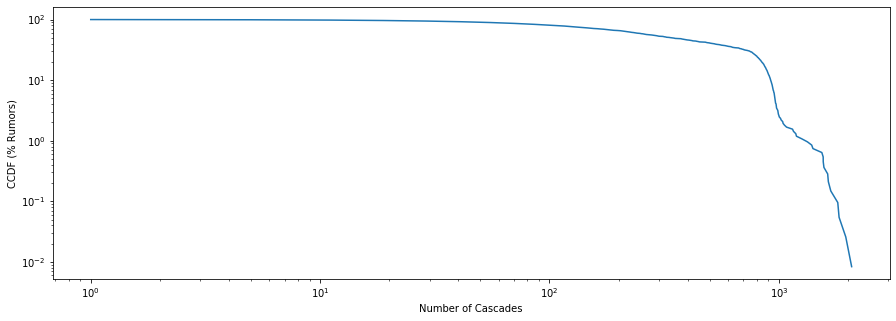

In [45]:
cdf_c_g = np.cumsum(y_values_c_g)
cdf_c_g[::-1].sort()
ccdf_c_g = (cdf_c_g/cdf_c_g[0]) * 100
plt.loglog(x_values_c_g, ccdf_c_g)
plt.xlabel("Number of Cascades")
plt.ylabel("CCDF (% Rumors)")
plt.show()

#### Plot Political

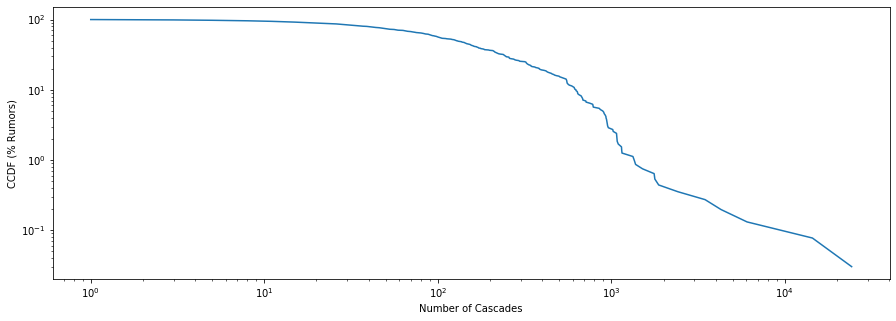

In [15]:
cdf_c = np.cumsum(y_values_c)
cdf_c[::-1].sort()
ccdf_c = (cdf_c/cdf_c[0]) * 100
plt.loglog(x_values_c, ccdf_c)
plt.xlabel("Number of Cascades")
plt.ylabel("CCDF (% Rumors)")
plt.show()

### Plot Both

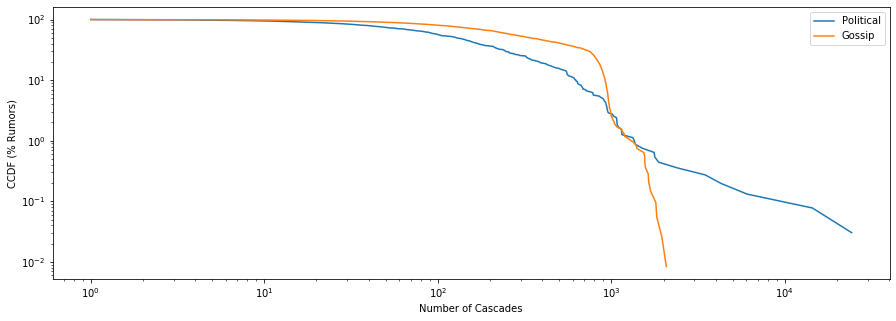

In [50]:
plt.loglog(x_values_c, ccdf_c, label = "Political")
plt.loglog(x_values_c_g, ccdf_c_g, label = "Gossip")
plt.xlabel("Number of Cascades")
plt.ylabel("CCDF (% Rumors)")
plt.legend()
plt.show()

## Cascade Size

### Cascade Size Gossip

In [132]:
items_s_g = []
for key, val in cascade_size.items():
    for it in cascade_size[key]:
        items_s_g.append(list(it.values())[0])
        
items_s_g = [int(it) for it in items_s_g]
items_s_g.sort()

In [91]:
x_values_s_g = list(set(items_s_g))
y_values_s_g = [0 for i in range(0, len(x_values_s_g))]

for i in range(0, len(x_values_s_g)):
    for it in items_s_g:
        if it <= x_values_s_g[i]:
            y_values_s_g[i] +=1
    
x_values_s_g.sort()

### Cascade Size Political

In [16]:
items_s = []
for key, val in cascade_size.items():
    for it in cascade_size[key]:
        items_s.append(list(it.values())[0])
        
items_s = [int(it) for it in items_s]
items_s.sort()

In [17]:
x_values_s = list(set(items_s))
y_values_s = [0 for i in range(0, len(x_values_s))]

for i in range(0, len(x_values_s)):
    for it in items_s:
        if it <= x_values_s[i]:
            y_values_s[i] +=1
    
x_values_s.sort()

#### Plot Gossip

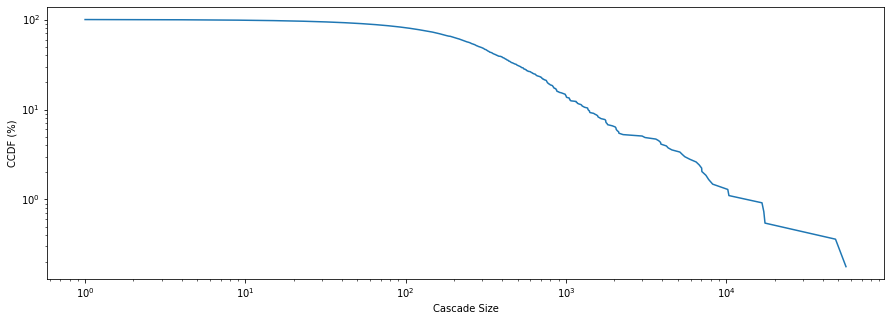

In [92]:
cdf_s_g = np.cumsum(y_values_s_g)
cdf_s_g[::-1].sort()
ccdf_s_g = (cdf_s_g/cdf_s_g[0]) * 100
plt.loglog(x_values_s_g, ccdf_s_g)
plt.xlabel("Cascade Size")
plt.ylabel("CCDF (%)")
plt.show()

#### Plot Political

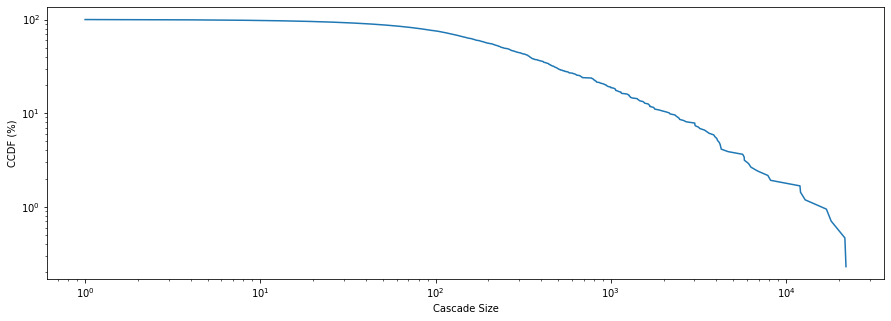

In [18]:
cdf_s = np.cumsum(y_values_s)
cdf_s[::-1].sort()
ccdf_s = (cdf_s/cdf_s[0]) * 100
plt.loglog(x_values_s, ccdf_s)
plt.xlabel("Cascade Size")
plt.ylabel("CCDF (%)")
plt.show()

### Plot Both
Gossip happens to have two outliers one at around 40k and another at around 50k. The latter is a fake news about Kim Kardashian propagadet by a famous social media

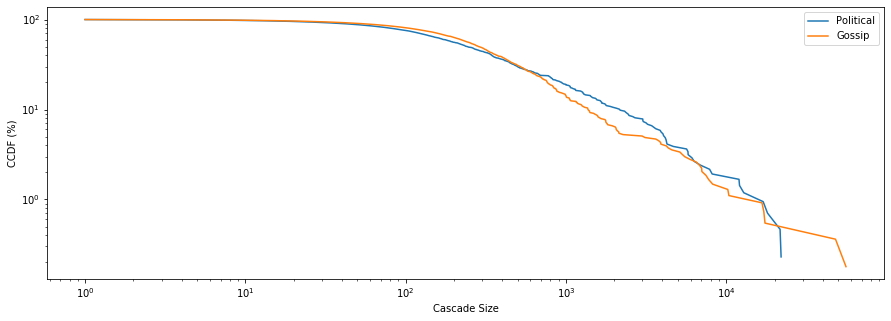

In [93]:
plt.loglog(x_values_s, ccdf_s, label = 'Political')
plt.loglog(x_values_s_g, ccdf_s_g, label = 'Gossip')
plt.xlabel("Cascade Size")
plt.ylabel("CCDF (%)")
plt.legend()
plt.show()

## Cascade maximum breadth

### Cascade maximum breadth Gossip

In [135]:
items_mb_g = []
for key, val in cascade_max_breadth.items():
    for it in cascade_max_breadth[key]:
        items_mb_g.append(list(it.values())[0])
        
items_mb_g = [int(it) for it in items_mb_g]
items_mb_g.sort()

In [138]:
x_values_mb_g = list(set(items_mb_g))
y_values_mb_g = [0 for i in range(0, len(x_values_mb_g))]

for i in range(0, len(x_values_mb_g)):
    for it in items_mb_g:
        if it <= x_values_mb_g[i]:
            y_values_mb_g[i] +=1
    
x_values_mb_g.sort()

In [139]:
avg_g = int(sum(y_values_mb_g)/len(y_values_mb_g))
y_values_mb2_g = np.array(y_values_mb_g) / avg_g

### Cascade maximum breadth Political

In [19]:
items_mb = []
for key, val in cascade_max_breadth.items():
    for it in cascade_max_breadth[key]:
        items_mb.append(list(it.values())[0])
        
items_mb = [int(it) for it in items_mb]
items_mb.sort()

In [20]:
x_values_mb = list(set(items_mb))
y_values_mb = [0 for i in range(0, len(x_values_mb))]

for i in range(0, len(x_values_mb)):
    for it in items_mb:
        if it <= x_values_mb[i]:
            y_values_mb[i] +=1
    
x_values_mb.sort()

In [22]:
avg = int(sum(y_values_mb)/len(y_values_mb))
y_values_mb2 = np.array(y_values_mb) / avg

#### Plot Political

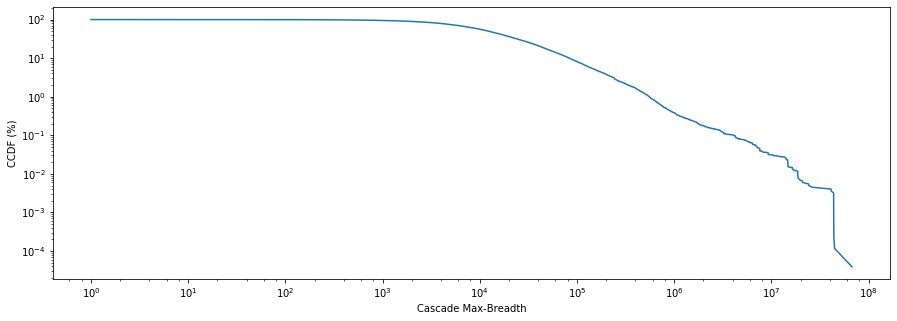

In [23]:
cdf_mb = np.cumsum(y_values_mb2)
cdf_mb[::-1].sort()
ccdf_mb = (cdf_mb/cdf_mb[0]) * 100

fig, ax = plt.subplots()
ax.loglog(x_values_mb, ccdf_mb)
allMajorTicks = matplotlib.ticker.LogLocator(base=10,numticks=10)
allMinorTicks = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
ax.xaxis.set_minor_locator(allMinorTicks)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_locator(allMajorTicks)
plt.xlabel("Cascade Max-Breadth")
plt.ylabel("CCDF (%)")
plt.show()

#### Plot Gossip

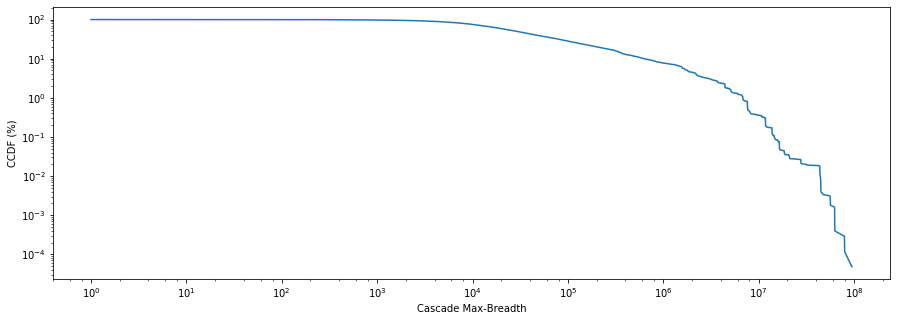

In [140]:
cdf_mb_g = np.cumsum(y_values_mb2_g)
cdf_mb_g[::-1].sort()
ccdf_mb_g = (cdf_mb_g/cdf_mb_g[0]) * 100

fig, ax = plt.subplots()
ax.loglog(x_values_mb_g, ccdf_mb_g)
allMajorTicks = matplotlib.ticker.LogLocator(base=10,numticks=10)
allMinorTicks = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
ax.xaxis.set_minor_locator(allMinorTicks)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_locator(allMajorTicks)
plt.xlabel("Cascade Max-Breadth")
plt.ylabel("CCDF (%)")
plt.show()

### Plot Both


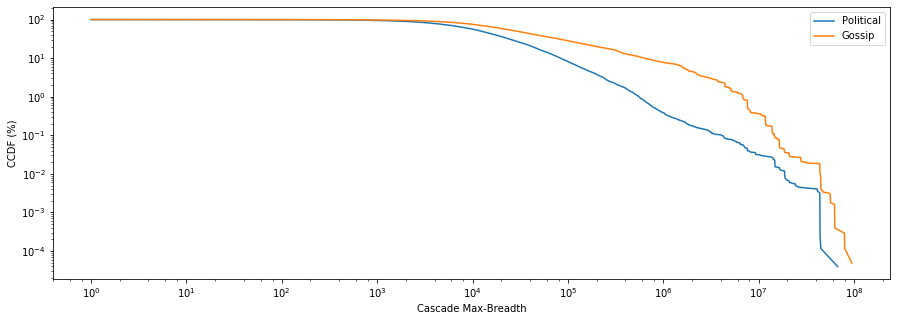

In [142]:
fig, ax = plt.subplots()
ax.loglog(x_values_mb, ccdf_mb, label="Political")
ax.loglog(x_values_mb_g, ccdf_mb_g, label="Gossip")
allMajorTicks = matplotlib.ticker.LogLocator(base=10,numticks=10)
allMinorTicks = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
ax.xaxis.set_minor_locator(allMinorTicks)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_major_locator(allMajorTicks)
plt.xlabel("Cascade Max-Breadth")
plt.ylabel("CCDF (%)")
plt.legend()
plt.show()